In [1]:
from image_helper import ImageHelper
from SRCNN_different_specs import RunSRCNN, SRCNN
import torch

/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image_helper = ImageHelper()
run_srcnn = RunSRCNN()

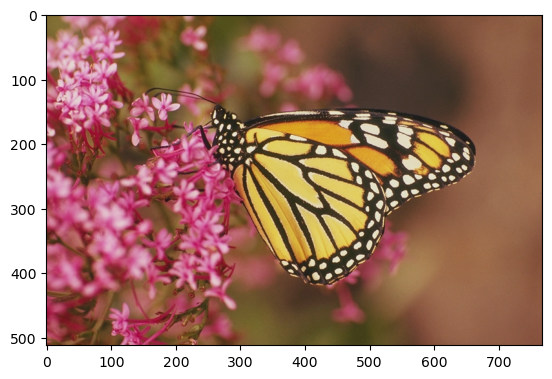

In [3]:
image_helper.open_and_show_image("./datasets/Set14/monarch.png")

[show_tensor_as_image] tensor_np.shape = (3, 170, 256)


/Users/pedrovelozo/anaconda3/lib/python3.10/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


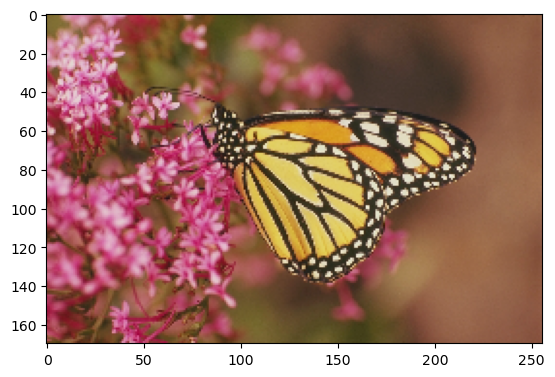

In [4]:
image_helper.downsample_image_as_tensor_and_show("./datasets/Set14/monarch.png", 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


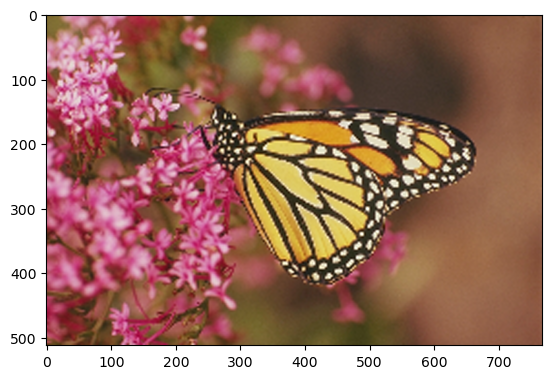

In [5]:
image_helper.downsample_and_upsample_image_as_tensor_and_show(
    "./datasets/Set14/monarch.png", 3
)

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_f2_1 = SRCNN()
try:
    model_f2_1.load_state_dict(torch.load('./results/srcnn/trained_models/model_f2_1.pth'))
except:
    model_f2_1.load_state_dict(torch.load('./results/srcnn/trained_models/model_f2_1.pth', map_location=torch.device('cpu')))

model_f2_5 = SRCNN()
try:
    model_f2_5.load_state_dict(torch.load('./results/srcnn/trained_models/model_f2_5.pth'))
except:
    model_f2_5.load_state_dict(torch.load('./results/srcnn/trained_models/model_f2_5.pth', map_location=torch.device('cpu')))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


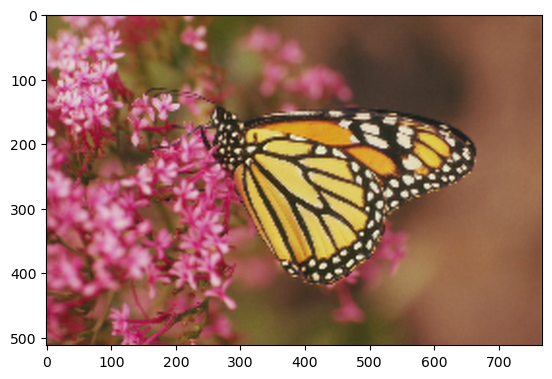

In [7]:
image_helper.apply_model_to_image_and_show(model_f2_1, "./datasets/Set14/monarch.png", 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


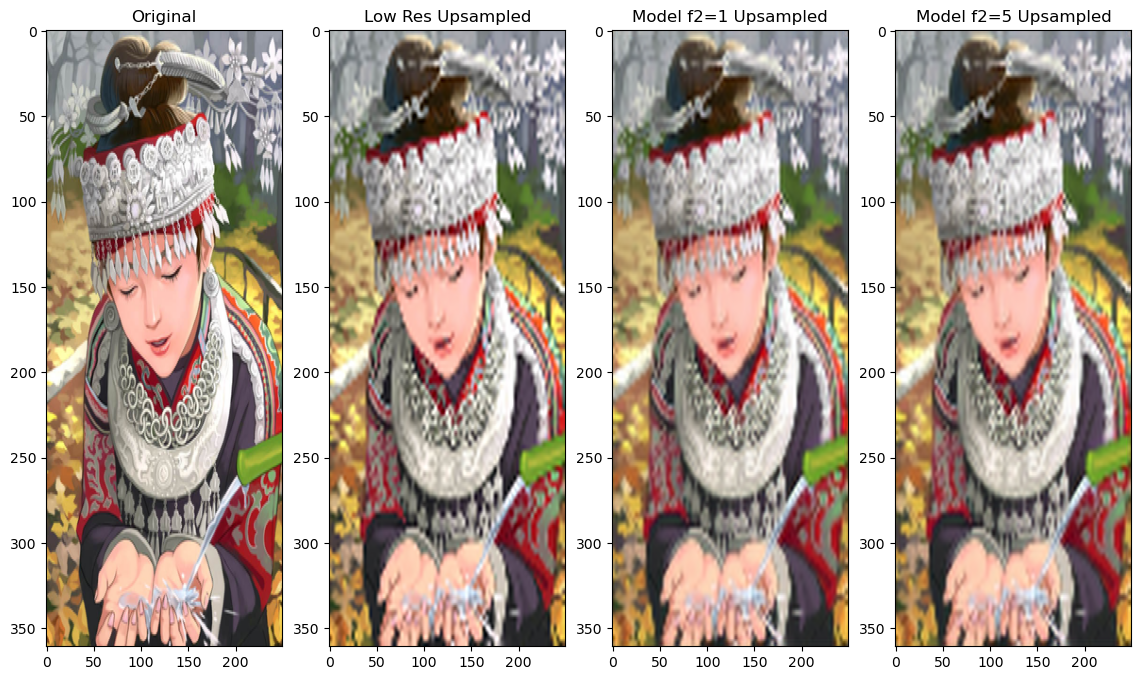

In [8]:
image_helper.show_tensor_as_images_side_by_side(
   [
         {
                "label": "Original",
                "tensor": image_helper.image_to_tensor(
                    "./datasets/Set14/comic.png"
                ),
         },
            {
                "label": "Low Res Upsampled",
                "tensor": image_helper.downsample_and_upsample_image_as_tensor(
                    "./datasets/Set14/comic.png", 3
                ),
            },
            {
                "label": "Model f2=1 Upsampled",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_1,
                    "./datasets/Set14/comic.png",
                    3
                )
            },
            {
                "label": "Model f2=5 Upsampled",
                "tensor": image_helper.apply_model_to_image(
                    model_f2_5,
                    "./datasets/Set14/comic.png",
                    3
                )
            }

   ],
)

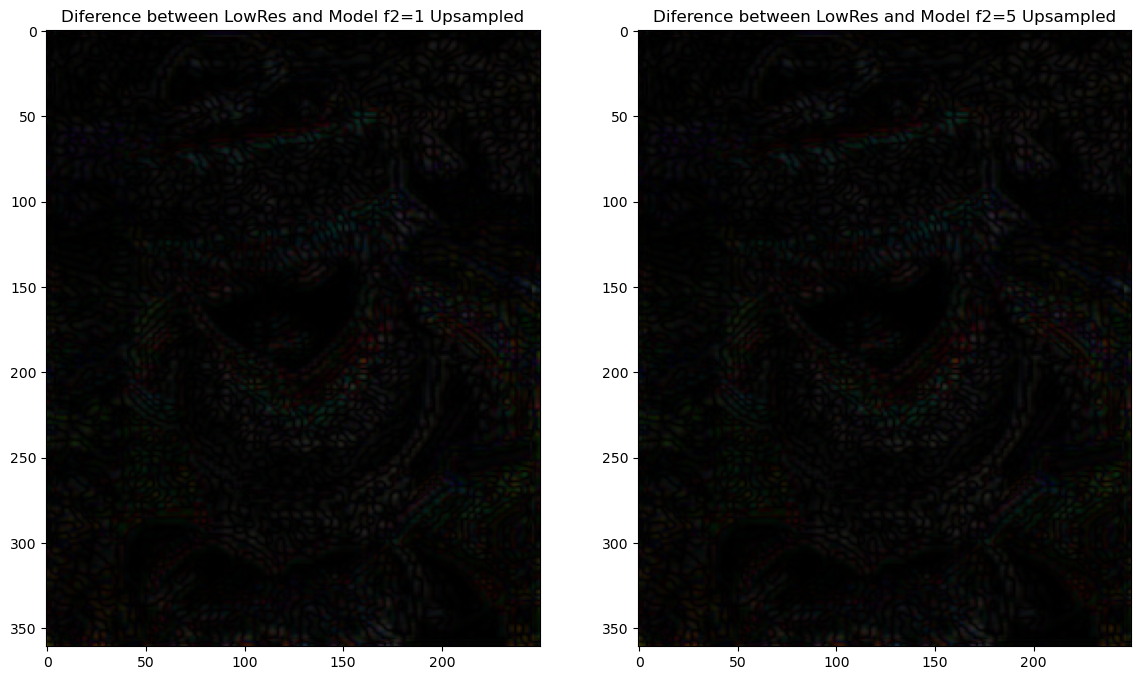

In [14]:
image_helper.show_tensor_as_images_side_by_side(
   [
         {
                "label": "Diference between LowRes and Model f2=1 Upsampled",
                "tensor": image_helper.get_differance_between_tensors(
                    image_helper.downsample_and_upsample_image_as_tensor(
                        "./datasets/Set14/comic.png", 3
                    ),
                    image_helper.apply_model_to_image(
                        model_f2_1,
                        "./datasets/Set14/comic.png",
                        3
                    )
                )
         },
            {
                "label": "Diference between LowRes and Model f2=5 Upsampled",
                "tensor": image_helper.get_differance_between_tensors(
                    image_helper.downsample_and_upsample_image_as_tensor(
                        "./datasets/Set14/comic.png", 3
                    ),
                    image_helper.apply_model_to_image(
                        model_f2_5,
                        "./datasets/Set14/comic.png",
                        3
                    )
                )
            }

   ],
)

(250, 361)
torch.Size([3, 361, 250])


/var/folders/5z/jvmv1stj4531scvqz47n7cpc0000gn/T/ipykernel_82472/3217182035.py:9: DeprecationWarning: LINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use BILINEAR or Resampling.BILINEAR instead.
  transforms.Resize((new_image.size[1] // 3, new_image.size[0] // 3), interpolation=Image.LINEAR),
/var/folders/5z/jvmv1stj4531scvqz47n7cpc0000gn/T/ipykernel_82472/3217182035.py:11: DeprecationWarning: LINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use BILINEAR or Resampling.BILINEAR instead.
  transforms.Resize((new_image.size[1], new_image.size[0]), interpolation=Image.LINEAR)


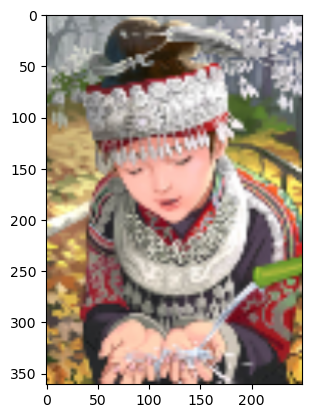

In [10]:
from torchvision import transforms
from PIL import Image


new_image = Image.open(f"./datasets/Set14/comic.png")
transform = transforms.Compose([
    transforms.ToTensor(),
    # resize image to 33x33 and downsample by BICUBIC interpolation
    transforms.Resize((new_image.size[1] // 3, new_image.size[0] // 3), interpolation=Image.LINEAR),
    # resize image to 256x256
    transforms.Resize((new_image.size[1], new_image.size[0]), interpolation=Image.LINEAR)
])

print(new_image.size)


new_image_lr = transform(new_image)
print(new_image_lr.shape)
# print(np.array(new_image).max())
image_helper.show_tensor_as_image(new_image_lr) # mudar pro arquivo novo


In [11]:
import matplotlib.pyplot as plt

plt.figure()
new_image_sr = model_2(new_image_lr.to(device))
new_image_sr_np = new_image_sr.cpu().detach().numpy()
plt.imshow(new_image_sr_np.transpose((1, 2, 0)))
plt.show()

NameError: name 'model_2' is not defined

<Figure size 640x480 with 0 Axes>